In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode 
import plotly.graph_objs as go # plotly graphical object
import warnings        # ignore filters
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # for encoding categorical variables
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
from subprocess import check_output
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [86]:
df = pd.read_csv('/content/drive/MyDrive/DATA/Omenda_work/cleaned#Economy,2020-2021(EygptCario).csv',encoding='latin-1')

In [87]:
df.head()

,Unnamed: 0,date,Tweet,Reply,retweetCount,Likes,Quote,lang,Coordinates,Country,hashtags
0,0,2021-12-30 06:56:34+00:00,SO it's not only in Lebanon that we have an $8...,0,0,2,0,en,"{'longitude': 35.0757711, 'latitude': 33.054742}","{'fullName': 'Lebanon', 'name': 'Lebanon', 'ty...","['lebanon', 'economy', 'corruption', 'occupati..."
1,1,2021-12-28 12:31:43+00:00,Ã¢ÂÂA perfect stormÃ¢ÂÂ: #supplychaincrisi...,0,0,5,0,en,"{'longitude': 12.2344266, 'latitude': 41.6558738}","{'fullName': 'Rome, Lazio', 'name': 'Rome', 't...","['supplychaincrisis', 'world', 'economy', 'COV..."
2,2,2021-12-28 10:11:08+00:00,"South Africa, Nigeria, and Angola should look ...",0,1,0,0,en,"{'longitude': 54.8939725, 'latitude': 24.6182526}","{'fullName': 'Dubai, United Arab Emirates', 'n...","['IMF', 'Rwanda', 'Benin', 'Seychelles', 'Poli..."
3,3,2021-12-28 09:52:24+00:00,"""Hypothetically, it would take $100bn to make ...",0,0,0,0,en,"{'longitude': 54.8939725, 'latitude': 24.6182526}","{'fullName': 'Dubai, United Arab Emirates', 'n...","['philanthropy', 'Development', 'Governance', ..."
4,4,2021-12-28 05:26:34+00:00,Pakistan Economy\nDecember inflation to reach ...,0,1,3,0,en,"{'longitude': 66.99920830570514, 'latitude': 2...","{'fullName': 'Business and Finance Centre', 'n...","['pakistan', 'pakistaneconomy', 'pakistanstock..."


In [88]:
df.shape

(780, 11)

In [89]:
df = df.drop('Unnamed: 0',axis = 1)

In [90]:
df.describe().applymap('{:,.2f}'.format)

,Reply,retweetCount,Likes,Quote
count,780.00,780.00,780.00,780.00
mean,0.27,1.03,3.62,0.07
std,1.35,5.09,15.49,0.62
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.00
75%,0.00,1.00,2.00,0.00
max,30.00,110.00,324.00,15.00


In [91]:
print('Number of languagues in the dataset:', df['lang'].nunique())

Number of languagues in the dataset: 18


In [92]:
df['lang']

0      en
1      en
2      en
3      en
4      en
       ..
775    tr
776    en
777    en
778    en
779    en
Name: lang, Length: 780, dtype: object

In [93]:
df = df.set_index("lang", inplace = False)


In [94]:
#dataset = df.rename(columns = {'content': 'tweetCount'}, inplace = False)
df.rename(index = {'en': 'English', 'tr': 'Turkey', 'it': 'Italian', 
                                  'el': 'Greek', 'ar': 'Arabic', 'und': 'Undertermined','es':'Spainish',
                                  'fr': 'French','fa':'Persian','ca':'Catalan','ur':'Urdu','de':'German','th':'Thai',
                             'hi': 'Hindi', 'in': 'Lingala','mr':'Marathi','tl':'Tagalog'}, inplace = True)

In [95]:
df.head()

,date,Tweet,Reply,retweetCount,Likes,Quote,Coordinates,Country,hashtags
lang,,,,,,,,,
English,2021-12-30 06:56:34+00:00,SO it's not only in Lebanon that we have an $8...,0,0,2,0,"{'longitude': 35.0757711, 'latitude': 33.054742}","{'fullName': 'Lebanon', 'name': 'Lebanon', 'ty...","['lebanon', 'economy', 'corruption', 'occupati..."
English,2021-12-28 12:31:43+00:00,Ã¢ÂÂA perfect stormÃ¢ÂÂ: #supplychaincrisi...,0,0,5,0,"{'longitude': 12.2344266, 'latitude': 41.6558738}","{'fullName': 'Rome, Lazio', 'name': 'Rome', 't...","['supplychaincrisis', 'world', 'economy', 'COV..."
English,2021-12-28 10:11:08+00:00,"South Africa, Nigeria, and Angola should look ...",0,1,0,0,"{'longitude': 54.8939725, 'latitude': 24.6182526}","{'fullName': 'Dubai, United Arab Emirates', 'n...","['IMF', 'Rwanda', 'Benin', 'Seychelles', 'Poli..."
English,2021-12-28 09:52:24+00:00,"""Hypothetically, it would take $100bn to make ...",0,0,0,0,"{'longitude': 54.8939725, 'latitude': 24.6182526}","{'fullName': 'Dubai, United Arab Emirates', 'n...","['philanthropy', 'Development', 'Governance', ..."
English,2021-12-28 05:26:34+00:00,Pakistan Economy\nDecember inflation to reach ...,0,1,3,0,"{'longitude': 66.99920830570514, 'latitude': 2...","{'fullName': 'Business and Finance Centre', 'n...","['pakistan', 'pakistaneconomy', 'pakistanstock..."


In [96]:
print("Total Number of languages used in the dataset:-")
df.groupby(['lang'])['Tweet'].count()


Total Number of languages used in the dataset:-


lang
Arabic            16
Catalan            3
English          525
French             3
German             2
Greek             23
Hindi              3
Italian           18
Lingala            1
Marathi            1
Persian            2
Spainish           3
Tagalog            1
Thai               1
Turkey            64
Undertermined    102
Urdu              10
iw                 2
Name: Tweet, dtype: int64

In [98]:
Tweet_lang = df[['Reply','retweetCount','Quote']]


In [99]:
df2 = Tweet_lang.nlargest(10,Tweet_lang)
print('The top 10 tweet count languages:\n', df2)

The top 10 tweet count languages:
                Reply  retweetCount  Quote
lang                                     
English           30           110     15
English           14            19      2
English            9            26      1
Turkey             5             0      0
Undertermined      4             0      0
Turkey             4             0      0
English            3            10      0
Greek              3            10      0
Undertermined      3             7      5
English            3             6      3


Most hashtag used on the dataset


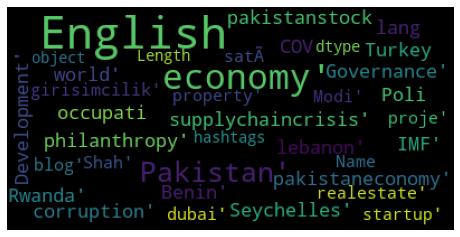

In [100]:
print('Most hashtag used on the dataset')
mpl.rcParams['figure.figsize']=(8.0,6.0)    
mpl.rcParams['font.size']=15              
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=700,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['hashtags']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

What was tweeted mostly on the dataset


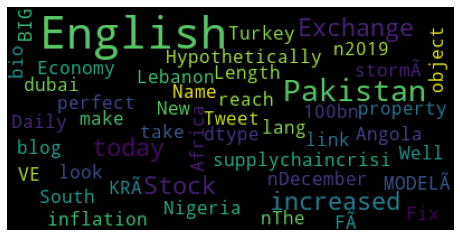

In [101]:
print('What was tweeted mostly on the dataset')
mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=15               #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['Tweet']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word2.png", dpi=900)